# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

# Observable trends 

As required by the instruction, the weather data from more than 500 random cities around the world was retrived using the OpenWeatherMap API and was collected on November 7 2020.  The data illustrated maximum temperature (in Celcius), humidity (%), cloudiness (%) and wind speed (mph) with the corresponding city, and with respect to the geo-coordinate, Latitude.

It's with no suprise that temperatures are higher closer to the Equator (at 0° Latitude) and are much lower in the Northern Hemisphere as winter is starting. This is due to the tilt of the earth and therefore receives less direct sunlight in the winter and becomes colder.

It is also important to note that temperatures peak at around  -15° to -25°Latitude with with an average temperature of about 32°c, and drop slightly further into the Southern Hemisphere (at -40° Latitude and below),close to the South Pole. This data obtained on  temperature is the result of seasons and the movement of the Earth around the Sun. 

Throughout the year the northern and southern hemispheres are alternately turned either toward or away from the sun depending on Earth's position in its orbit. The hemisphere facing the sun at that monment receives more sunlight and is in summer, while the other hemisphere receives less sun and is in winter.

There's little to no apparent correlation between humidity and Latitude(rvalue =.27), cloudiness and Latitude(rvalue =.26). The scatter plot is relatively even at each Latitudes. However, a small grouping of cities show low humity levels (at 0% humidity) in both Hemishperes.

As for wind Speed and Latitude, wind speeds increase in the upper and lower halves on the hemisphere, especially in the north (around 55° to 70° Latitude), and do not go above 10mph within 30° of the Equator.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
import json


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy


# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


623

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#Get the Weather data
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

weather_response = requests.get(query_url + city)
weather_json = weather_response.json()

#print(json.dumps(weather_json, indent=4))
#print(requests.get(query_url+city))

# Set Up Lists to Hold Reponse Info
city_name = []
latitude= []
longitude = []
max_temperature = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

# Processing Record Counter Starting a 1
processing_record = 1

# Print Starting Log Statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

# Loop Through List of Cities & Perform a Request for Data on Each
for city in cities:
   
     
# Exception Handling
    try:
        response = requests.get(query_url+ city).json()
        city_name.append(response["name"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        max_temperature.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(pd.to_datetime(response["dt"],unit='s'))
        current_city = response["name"]
        print(f"Processing Record {processing_record}| {current_city}")
    
        # Increase Processing Record Counter by 1 For Each Loop
        processing_record += 1
          
    except:
        print("City not found next ...") 
    continue

# Print Ending Log Statement
print(f"-------------------------------")
print(f"Data Retrieval Complete")
print(f"-------------------------------")
          

Beginning Data Retrieval
-------------------------------
Processing Record 1| Międzyrzec Podlaski
Processing Record 2| New Norfolk
Processing Record 3| Yatou
Processing Record 4| Lakshettipet
Processing Record 5| Iqaluit
City not found next ...
Processing Record 6| Punta Arenas
Processing Record 7| Bluff
Processing Record 8| Qaanaaq
Processing Record 9| Camargo
Processing Record 10| Rikitea
Processing Record 11| Bethel
City not found next ...
Processing Record 12| Nagato
Processing Record 13| Salalah
Processing Record 14| Qaqortoq
Processing Record 15| Flinders
Processing Record 16| Sisimiut
Processing Record 17| East London
Processing Record 18| Ginda
City not found next ...
Processing Record 19| Busselton
Processing Record 20| Dwārka
Processing Record 21| Clyde River
Processing Record 22| Monte Alegre
Processing Record 23| Yellowknife
Processing Record 24| Thinadhoo
Processing Record 25| Barrow
Processing Record 26| Balyqshy
Processing Record 27| Ushuaia
Processing Record 28| Kota Bh

Processing Record 243| Zonguldak
City not found next ...
Processing Record 244| Vila Velha
Processing Record 245| Laguna
Processing Record 246| Eyl
Processing Record 247| Arrondissement de Gourdon
Processing Record 248| Yumen
Processing Record 249| Mount Isa
Processing Record 250| Tazovsky
Processing Record 251| Ylöjärvi
Processing Record 252| Gorontalo
Processing Record 253| Chu
Processing Record 254| Richards Bay
Processing Record 255| Ligayan
Processing Record 256| Provideniya
Processing Record 257| Hervey Bay
Processing Record 258| Sherbakul'
Processing Record 259| Saint-François
Processing Record 260| Abaza
Processing Record 261| Kiryat Gat
City not found next ...
Processing Record 262| Makar'yev
Processing Record 263| Torbay
Processing Record 264| Farafangana
Processing Record 265| Bintulu
Processing Record 266| Comodoro Rivadavia
Processing Record 267| Katobu
Processing Record 268| Champerico
Processing Record 269| Samarai
Processing Record 270| Sarīla
Processing Record 271| Ben

Processing Record 478| Beloha
Processing Record 479| Ammon
Processing Record 480| Barranca
City not found next ...
Processing Record 481| Henties Bay
Processing Record 482| Okhotsk
Processing Record 483| Matamoros
Processing Record 484| Porto-Novo
Processing Record 485| Neiafu
Processing Record 486| Sola
Processing Record 487| Invermere
Processing Record 488| Pacific Grove
Processing Record 489| Ağdam
Processing Record 490| Whitehorse
Processing Record 491| Saint-Joseph
Processing Record 492| Marawi
Processing Record 493| Stokmarknes
Processing Record 494| Arrondissement du Havre
Processing Record 495| Codajás
Processing Record 496| Muscle Shoals
Processing Record 497| Walvis Bay
Processing Record 498| Susurluk
Processing Record 499| Mana
Processing Record 500| Canguçu
Processing Record 501| Shchors
Processing Record 502| Karratha
Processing Record 503| Karwar
Processing Record 504| Culiacancito
Processing Record 505| Narrabri
Processing Record 506| Mādhogarh
Processing Record 507| Yam

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weather_df = pd.DataFrame({"City":city_name, "Latitude":latitude, "Longitude":longitude,
    "Maximum Temperature": max_temperature,"Humidity %":humidity, "Cloudiness %": cloudiness
   ,"Wind Speed(mph)": wind_speed,"Country":country,"Date":date})

weather_df

,City,Latitude,Longitude,Maximum Temperature,Humidity %,Cloudiness %,Wind Speed(mph),Country,Date
0,Międzyrzec Podlaski,51.99,22.78,6.23,94,0,2.79,PL,2020-11-08 00:59:28
1,New Norfolk,-42.78,147.06,18.89,47,20,3.60,AU,2020-11-08 00:59:28
2,Yatou,37.15,122.38,9.30,49,0,6.91,CN,2020-11-08 00:59:29
3,Lakshettipet,18.87,79.22,16.66,58,0,1.11,IN,2020-11-08 00:59:29
4,Iqaluit,63.75,-68.51,-14.00,77,75,2.10,CA,2020-11-08 00:59:29
...,...,...,...,...,...,...,...,...,...
570,Deputatsky,69.30,139.90,-19.55,93,100,1.47,RU,2020-11-08 00:57:41
571,Umm Kaddadah,13.60,26.69,21.86,29,52,5.54,SD,2020-11-08 01:01:21
572,Santa Cruz,30.42,-9.60,15.00,87,0,2.60,MA,2020-11-08 01:01:21
573,Rincon,32.30,-81.24,21.00,88,20,3.10,US,2020-11-08 01:01:21


In [5]:
# Output File (CSV)
output_data_file = "../output_data/cities.csv"
weather_df.to_csv(output_data_file)




## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
weather_humidity_inspected = weather_df.loc[weather_df["Humidity %"] <= 100 , :]
weather_humidity_inspected

,City,Latitude,Longitude,Maximum Temperature,Humidity %,Cloudiness %,Wind Speed(mph),Country,Date
0,Międzyrzec Podlaski,51.99,22.78,6.23,94,0,2.79,PL,2020-11-08 00:59:28
1,New Norfolk,-42.78,147.06,18.89,47,20,3.60,AU,2020-11-08 00:59:28
2,Yatou,37.15,122.38,9.30,49,0,6.91,CN,2020-11-08 00:59:29
3,Lakshettipet,18.87,79.22,16.66,58,0,1.11,IN,2020-11-08 00:59:29
4,Iqaluit,63.75,-68.51,-14.00,77,75,2.10,CA,2020-11-08 00:59:29
...,...,...,...,...,...,...,...,...,...
570,Deputatsky,69.30,139.90,-19.55,93,100,1.47,RU,2020-11-08 00:57:41
571,Umm Kaddadah,13.60,26.69,21.86,29,52,5.54,SD,2020-11-08 01:01:21
572,Santa Cruz,30.42,-9.60,15.00,87,0,2.60,MA,2020-11-08 01:01:21
573,Rincon,32.30,-81.24,21.00,88,20,3.10,US,2020-11-08 01:01:21


In [7]:
#  Get the indices of cities that have humidity over 100%.
weather_high_humidity = weather_df.loc[weather_df["Humidity %"] > 100 , :]
indices_high_humidity = weather_high_humidity.index.values
print(indices_high_humidity)

[]


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
weather_df.drop (indices_high_humidity, inplace=True)
weather_df


,City,Latitude,Longitude,Maximum Temperature,Humidity %,Cloudiness %,Wind Speed(mph),Country,Date
0,Międzyrzec Podlaski,51.99,22.78,6.23,94,0,2.79,PL,2020-11-08 00:59:28
1,New Norfolk,-42.78,147.06,18.89,47,20,3.60,AU,2020-11-08 00:59:28
2,Yatou,37.15,122.38,9.30,49,0,6.91,CN,2020-11-08 00:59:29
3,Lakshettipet,18.87,79.22,16.66,58,0,1.11,IN,2020-11-08 00:59:29
4,Iqaluit,63.75,-68.51,-14.00,77,75,2.10,CA,2020-11-08 00:59:29
...,...,...,...,...,...,...,...,...,...
570,Deputatsky,69.30,139.90,-19.55,93,100,1.47,RU,2020-11-08 00:57:41
571,Umm Kaddadah,13.60,26.69,21.86,29,52,5.54,SD,2020-11-08 01:01:21
572,Santa Cruz,30.42,-9.60,15.00,87,0,2.60,MA,2020-11-08 01:01:21
573,Rincon,32.30,-81.24,21.00,88,20,3.10,US,2020-11-08 01:01:21


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

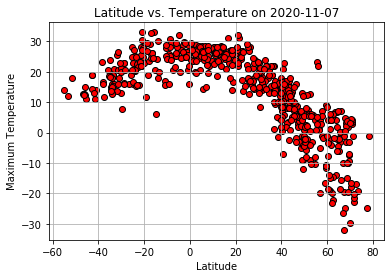

In [9]:
#Build Scatter Plot for Each Data Type
# Incorporate Other Graph Properties
from datetime import datetime
plt.scatter(weather_df["Latitude"],weather_df["Maximum Temperature"], facecolors="red", marker="o", edgecolor="black")
plt.title(f"Latitude vs. Temperature on {datetime.today().date()}")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature")
plt.grid(True)

# Save Figure
plt.savefig("../output_data/City_Latitude_vs_Max_Temperature.png")

plt.show()

## Latitude vs. Humidity Plot

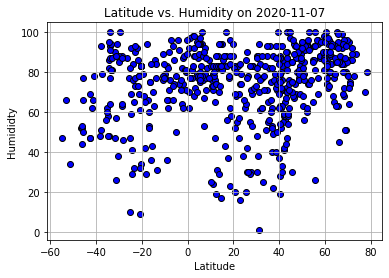

In [10]:
#Build Scatter Plot for Each Data Type
# Incorporate Other Graph Properties

plt.scatter(weather_df["Latitude"],weather_df["Humidity %"],facecolors="blue", marker="o", edgecolor="black")
plt.title(f"Latitude vs. Humidity on {datetime.today().date()}")
plt.xlabel("Latitude")
plt.ylabel("Humididty")
plt.grid(True)

# Save Figure
plt.savefig("../output_data/City_Latitude_vs_Humidity.png")


plt.show()

## Latitude vs. Cloudiness Plot

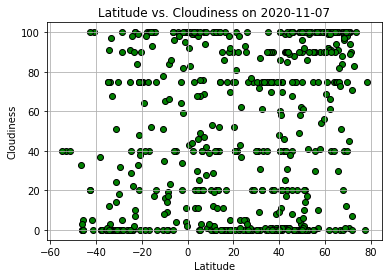

In [11]:
#Build Scatter Plot for Each Data Type
# Incorporate Other Graph Properties

plt.scatter(weather_df["Latitude"],weather_df["Cloudiness %"],facecolors="green", marker="o", edgecolor="black")
plt.title(f"Latitude vs. Cloudiness on {datetime.today().date()}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)
# Save Figure
plt.savefig("../output_data/City_Latitude_vs_Cloudiness.png")


plt.show()

## Latitude vs. Wind Speed Plot

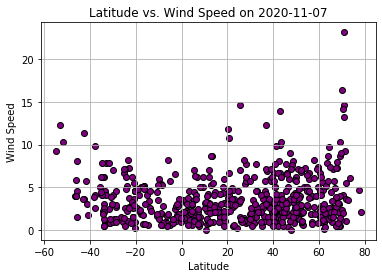

In [12]:
#Build Scatter Plot for Each Data Type
# Incorporate Other Graph Properties

plt.scatter(weather_df["Latitude"],weather_df["Wind Speed(mph)"],facecolors="purple", marker="o", edgecolor="black")
plt.title(f"Latitude vs. Wind Speed on {datetime.today().date()}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(True)

# Save Figure
plt.savefig("../output_data/City_Latitude_vs_Wind_Speed.png")


plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

y = -0.57x + 32.88


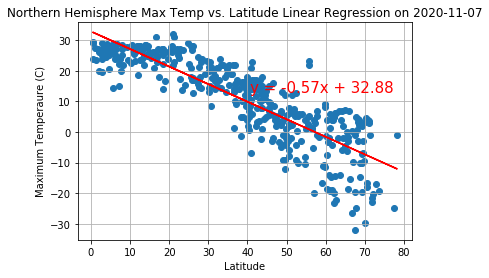

In [13]:
#Build Scatter Plot for Each Data Type
# Incorporate Other Graph Properties

#Extraction of Northern Hemisphere Data
northern_hemisphere = weather_df.loc[weather_df["Latitude"]>0]
x_values = northern_hemisphere["Latitude"]
y_values = northern_hemisphere["Maximum Temperature"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(x_values.median(),y_values.median()),fontsize=15,color="red")
plt.title(f"Northern Hemisphere Max Temp vs. Latitude Linear Regression on {datetime.today().date()}")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperaure (C)")
plt.grid(True)


# Save Figure
plt.savefig("../output_data/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

print(line_eq)
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

y = 0.28x + 27.59


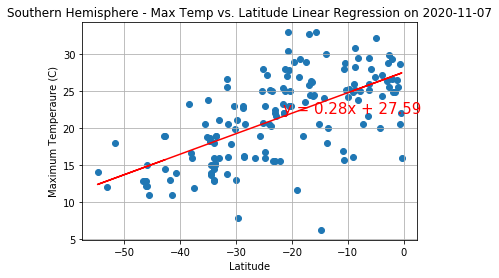

In [14]:
#Build Scatter Plot for Each Data Type
# Incorporate Other Graph Properties

#Extraction of Northern Hemisphere Data
southern_hemisphere = weather_df.loc[weather_df["Latitude"]<0]
x_values = southern_hemisphere["Latitude"]
y_values = southern_hemisphere["Maximum Temperature"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(x_values.median(),y_values.median()),fontsize=15,color="red")
plt.title(f"Southern Hemisphere - Max Temp vs. Latitude Linear Regression on {datetime.today().date()}")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperaure (C)")
plt.grid(True)

# Save Figure
plt.savefig("../output_data/southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")


print(line_eq)
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = 0.17x + 69.19


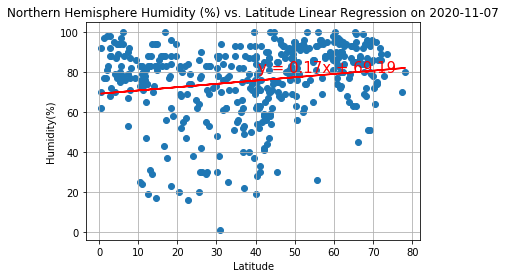

0.18213875526744325


In [15]:
#Build Scatter Plot for Each Data Type
# Incorporate Other Graph Properties

y_values = northern_hemisphere["Humidity %"]
x_values =  northern_hemisphere["Latitude"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(x_values.median(),y_values.median()),fontsize=15,color="red")
plt.title(f"Northern Hemisphere Humidity (%) vs. Latitude Linear Regression on {datetime.today().date()}")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.grid(True)

# Save Figure
plt.savefig("../output_data/Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

print(line_eq)
plt.show()
print(rvalue)


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = 0.32x + 77.21


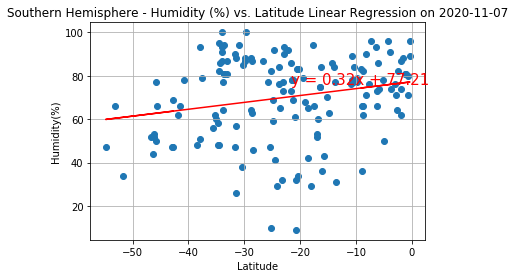

In [16]:
#Build Scatter Plot for Each Data Type
# Incorporate Other Graph Properties

y_values = southern_hemisphere["Humidity %"]
x_values =  southern_hemisphere["Latitude"] 

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(x_values.median(),y_values.median()),fontsize=15,color="red")
plt.title(f"Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression on {datetime.today().date()}")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.grid(True)

# Save Figure
plt.savefig("../output_data/Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

print(line_eq)
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = 0.43x + 32.93


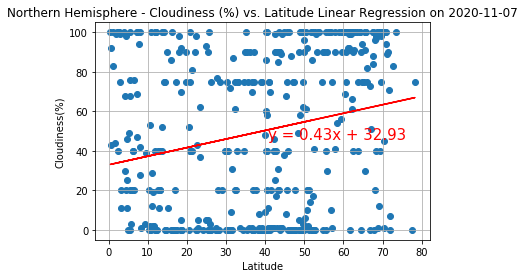

0.22028858912807397


In [17]:
#Build Scatter Plot for Each Data Type
# Incorporate Other Graph Properties

y_values = northern_hemisphere["Cloudiness %"]
x_values =  northern_hemisphere["Latitude"] 

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(x_values.median(),y_values.median()),fontsize=15,color="red")
plt.title(f"Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression on {datetime.today().date()}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.grid(True)

# Save Figure
plt.savefig("../output_data/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

print(line_eq)
plt.show()
print(rvalue)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = 0.94x + 63.47


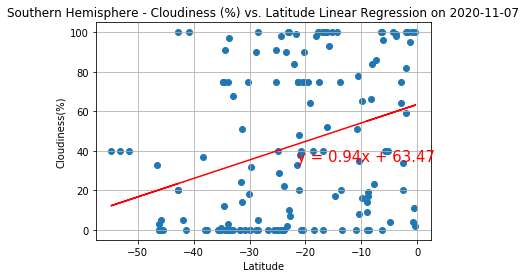

In [18]:
#Build Scatter Plot for Each Data Type
# Incorporate Other Graph Properties

y_values = southern_hemisphere["Cloudiness %"]
x_values = southern_hemisphere["Latitude"] 

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(x_values.median(),y_values.median()),fontsize=15,color="red")


plt.title(f"Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression on {datetime.today().date()}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.grid(True)

# Save Figure
plt.savefig("../output_data/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

print(line_eq)
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = 0.03x + 2.54


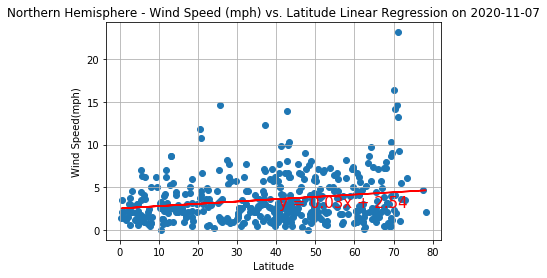

In [19]:
y_values = northern_hemisphere["Wind Speed(mph)"]
x_values = northern_hemisphere["Latitude"] 

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(x_values.median(),y_values.median()),fontsize=15,color="red")


plt.title(f"Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression on {datetime.today().date()}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.grid(True)

# Save Figure
plt.savefig("../output_data/Northern Hemisphere - WindSpeed(mph)) vs. Latitude Linear Regression.png")

print(line_eq)
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = -0.07x + 1.93


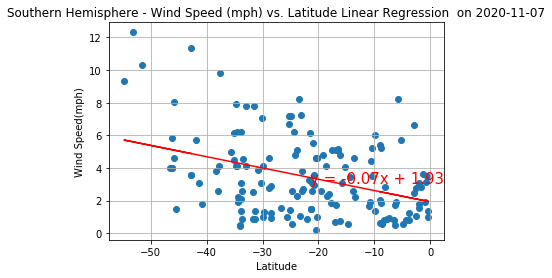

In [20]:
y_values = southern_hemisphere["Wind Speed(mph)"]
x_values = southern_hemisphere["Latitude"] 

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(x_values.median(),y_values.median()),fontsize=15,color="red")


plt.title(f"Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression  on {datetime.today().date()}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.grid(True)

# Save Figure
plt.savefig("../output_data/Southern Hemisphere - WindSpeed(mph)) vs. Latitude Linear Regression.png")

print(line_eq)
plt.show()